##  Outlier Detection and Handling using IQR 

///Objective: Identify and handle outliers in a numerical column using the Interquartile Range (IQR) method.///

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

///Load Data://

In [2]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100).tolist()
data.extend([150,170,200]) ## add outliers in a list
df=pd.DataFrame({'score':data})
print("Initial Data:\n",df.head())


Initial Data:
        score
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


//Visualize to show the outliers//

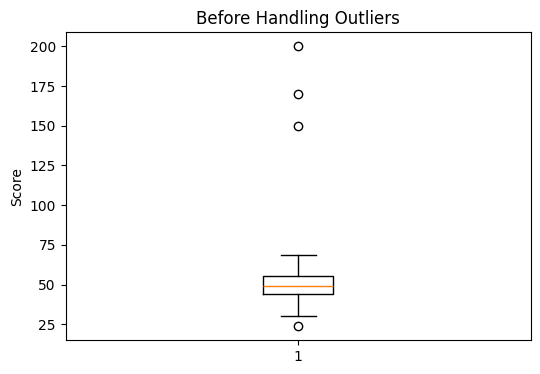

In [3]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['score'])
plt.title("Before Handling Outliers")
plt.ylabel("Score")
plt.show()

///Calculate IQR//

In [6]:
Q1=df['score'].quantile(0.25)
Q3=df['score'].quantile(0.75)
IQR=Q3-Q1
print("\n Q1:\n",Q1)
print("Q3:\n",Q3)
print("IQR:\n",IQR)




 Q1:
 44.18536890420111
Q3:
 55.279137383496604
IQR:
 11.093768479295491


///Define Outlier Boundaries://

In [7]:
Lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("\n Lower Boundaries:\n",Lower_bound)
print("\n Upper boundaries:\n",upper_bound)


 Lower Boundaries:
 27.544716185257876

 Upper boundaries:
 71.91979010243983


////Identify Outliers://

In [8]:
Outliers=df[(df['score']<Lower_bound)|(df['score']>upper_bound)]
print("\n Outliers Found:\n",Outliers)


 Outliers Found:
           score
74    23.802549
100  150.000000
101  170.000000
102  200.000000


///Handle Outliers//

In [9]:
df.loc[df['score'] < Lower_bound, 'score'] = Lower_bound
df.loc[df['score'] > upper_bound, 'score'] = upper_bound
print("After capping outliers;\n",df.tail())

After capping outliers;
          score
98   50.051135
99   47.654129
100  71.919790
101  71.919790
102  71.919790


///Visualize BoxPlot after cappling Outliers//

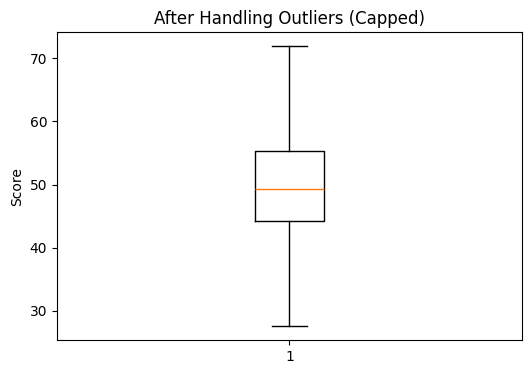

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['score'])
plt.title("After Handling Outliers (Capped)")
plt.ylabel("Score")
plt.show()